## **IMDB Dataset of top 1000 movies and tv shows.**

### **Importing all required libraries**

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')   

### **Loading The Data**

In [320]:
path = r'D:\Python\EDA\IMDB Movie\imdb_top_1000.csv'
data = pd.read_csv(path)

#### **Searching a movie**

In [321]:
search_title = "Taare Zameen Par"

# Perform the search
result = data['Series_Title'][data['Series_Title'].str.contains(search_title, case=False)]

# Display the result
print(result)

65    Taare Zameen Par
Name: Series_Title, dtype: object


### **Data Reading**

In [322]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Shape of the data

In [323]:
print("The shape of the dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


Information about the data

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [325]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


In [326]:
data.describe(include='object').T

,count,unique,top,freq
Poster_Link,1000,1000,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1
Series_Title,1000,999,Drishyam,2
Released_Year,1000,100,2014,32
Certificate,899,16,U,234
Runtime,1000,140,100 min,23
Genre,1000,202,Drama,85
Overview,1000,1000,Two imprisoned men bond over a number of years...,1
Director,1000,548,Alfred Hitchcock,14
Star1,1000,660,Tom Hanks,12
Star2,1000,841,Emma Watson,7


### **Data Cleaning**
### **Renaming the Column**

In [327]:
data.rename(columns={"Series_Title": "Movies_Title"}, inplace=True)

In [328]:
data['Runtime'] = data['Runtime'].str.split().str.get(0)
data['Runtime']=data['Runtime'].astype('int')

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Movies_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int32  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 121.2+ KB


### **Removing Unnessory column**

In [330]:
data.drop(columns=['Poster_Link','Overview'], axis=1, inplace=True)

### **Finding The Missing Values**

In [331]:
data.isnull().sum()

Movies_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### **Imputation**

In [332]:
print(data['Gross'].head(1))
data['Gross'] = data['Gross'].str.replace(',', '')
print(data['Gross'].head(1), '\n')

data['Gross'].replace(np.nan, 0, inplace=True)

data['Gross'] = data['Gross'].astype(int)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object 



In [333]:
data['Meta_score'].replace(np.nan, inplace=True)

In [334]:
data['Certificate'].fillna('Not Rated', inplace=True)

In [335]:
data.isnull().sum()

Movies_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

### **Finding The Duplicates**

In [336]:
data.duplicated().sum()

0

In [337]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,1000.0,1.228910e+02,2.809367e+01,45.0,103.00,119.0,137.00,321.0
IMDB_Rating,1000.0,7.949300e+00,2.754912e-01,7.6,7.70,7.9,8.10,9.3
Meta_score,1000.0,7.866700e+01,1.245613e+01,28.0,71.00,80.0,88.00,100.0
No_of_Votes,1000.0,2.736929e+05,3.273727e+05,25088.0,55526.25,138548.5,374161.25,2343110.0
Gross,1000.0,5.653688e+07,1.032382e+08,0.0,445709.75,10702751.5,61539891.25,936662225.0


In [338]:
data.describe(include='object').T

,count,unique,top,freq
Movies_Title,1000,999,Drishyam,2
Released_Year,1000,100,2014,32
Certificate,1000,17,U,234
Genre,1000,202,Drama,85
Director,1000,548,Alfred Hitchcock,14
Star1,1000,660,Tom Hanks,12
Star2,1000,841,Emma Watson,7
Star3,1000,891,Rupert Grint,5
Star4,1000,939,Michael Caine,4


In [339]:
data['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


### **Exploratory Data Analysis**
#### **Unoveriate Analysis**

In [340]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(include=np.number).columns

print(cat_col)
print(num_col)

Index(['Movies_Title', 'Released_Year', 'Certificate', 'Genre', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4'],
      dtype='object')
Index(['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'], dtype='object')


Released_Year


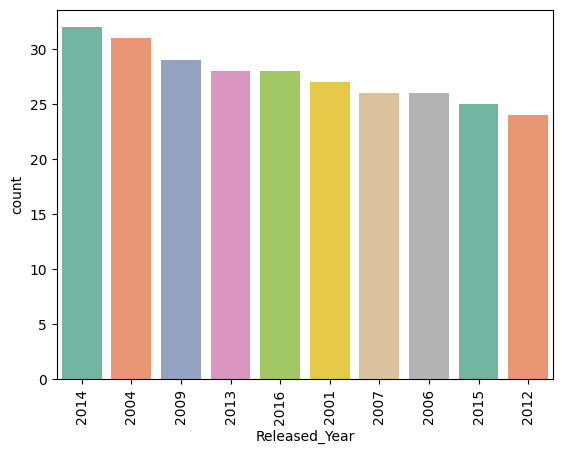

Certificate


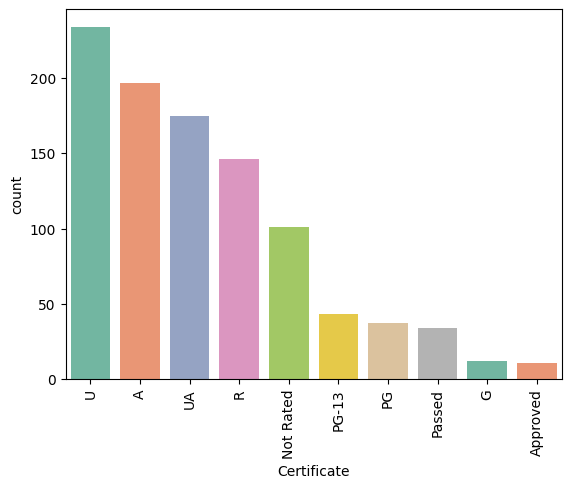

Genre


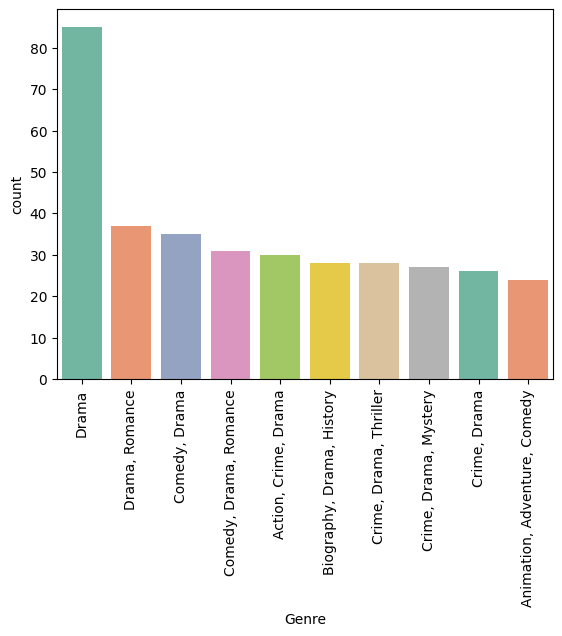

Director


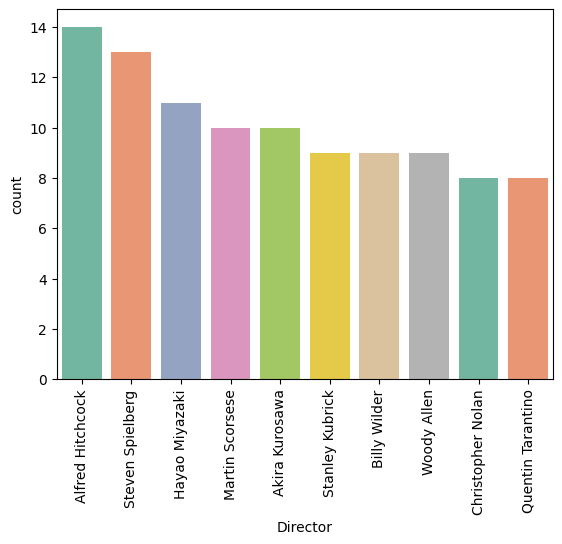

Star1


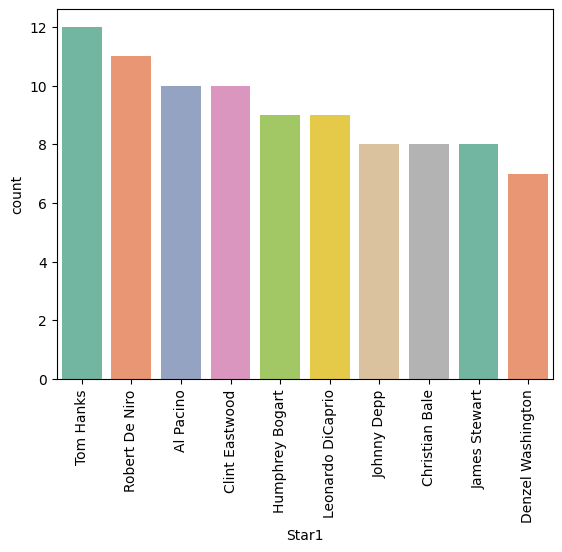

Star2


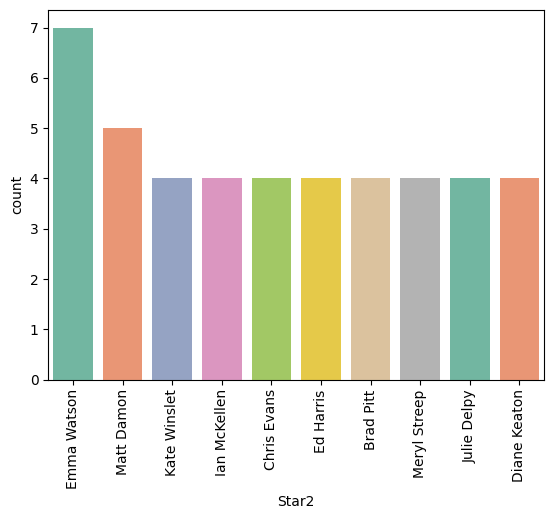

Star3


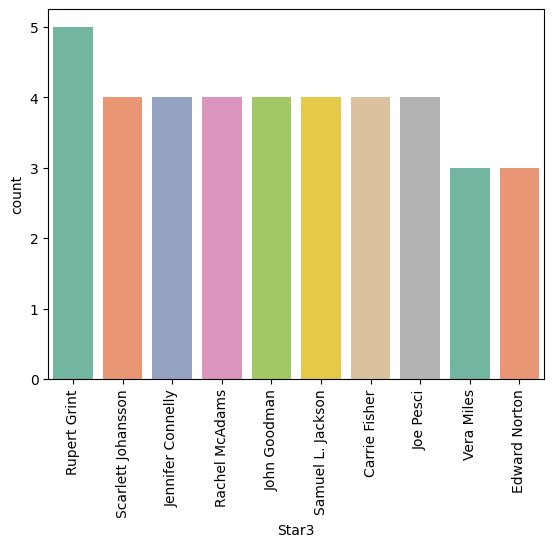

Star4


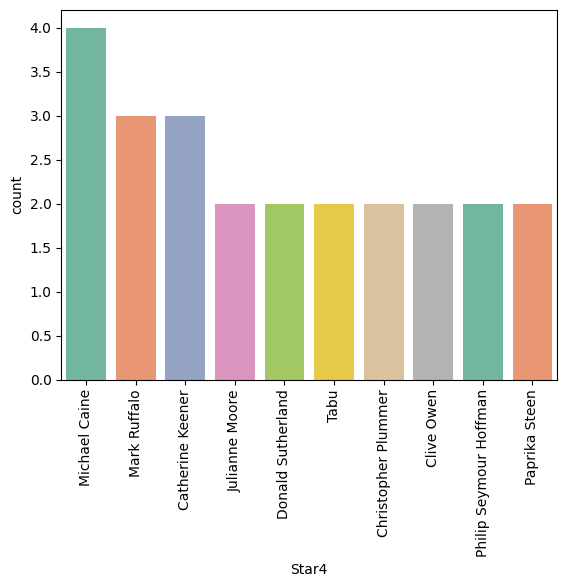

In [341]:
for col in cat_col:
    if col =='Movies_Title':
        continue
    print(col)

    plt.figure()
    sns.countplot(x=col, data=data, order=list(data[col].value_counts().head(10).index), palette='Set2')
    plt.xticks(rotation=90)
    plt.show()

Runtime


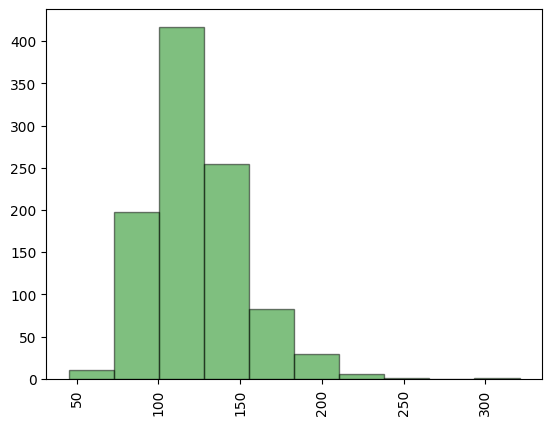

IMDB_Rating


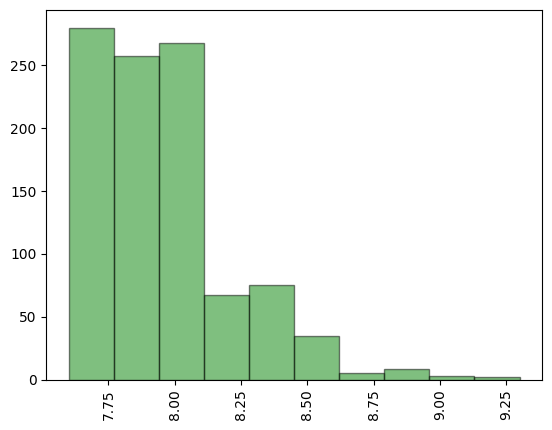

Meta_score


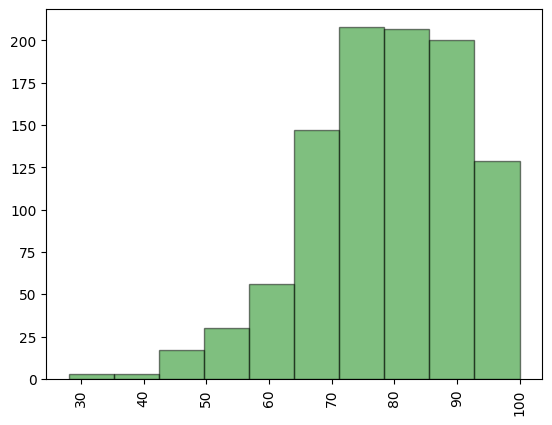

No_of_Votes


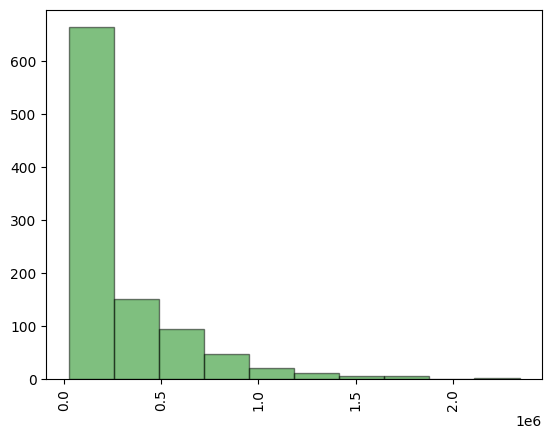

Gross


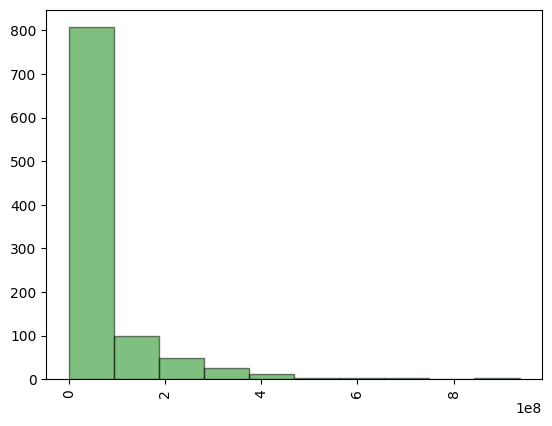

In [342]:
for col in num_col:
    print(col)

    plt.figure()
    data[col].hist(bins=10, color='green', edgecolor = 'black', alpha=0.5, grid=False)
    plt.xticks(rotation=90)
    plt.show()   

### **Voting Analysis**

In [343]:
vates = data.groupby('Movies_Title').agg({'No_of_Votes':'max'}).sort_values(by='No_of_Votes',ascending=False).reset_index()
vates.head(10)

,Movies_Title,No_of_Votes
0,The Shawshank Redemption,2343110
1,The Dark Knight,2303232
2,Inception,2067042
3,Fight Club,1854740
4,Pulp Fiction,1826188
5,Forrest Gump,1809221
6,The Matrix,1676426
7,The Lord of the Rings: The Fellowship of the Ring,1661481
8,The Lord of the Rings: The Return of the King,1642758
9,The Godfather,1620367


In [344]:
data[data['Movies_Title'] == 'The Shawshank Redemption']

,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469


### **Gross Collection Analysis**

In [345]:
gross = data.groupby('Movies_Title').agg({'Gross':'max'}).sort_values(by='Gross',ascending=False).reset_index()
gross.head(10)

,Movies_Title,Gross
0,Star Wars: Episode VII - The Force Awakens,936662225
1,Avengers: Endgame,858373000
2,Avatar,760507625
3,Avengers: Infinity War,678815482
4,Titanic,659325379
5,The Avengers,623279547
6,Incredibles 2,608581744
7,The Dark Knight,534858444
8,Rogue One,532177324
9,The Dark Knight Rises,448139099


In [346]:
data[data['Movies_Title'] == 'Star Wars: Episode VII - The Force Awakens']

,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225


### **Movie Timing**

In [347]:
timing = data.groupby('Movies_Title').agg({'Runtime':'max'}).sort_values(by='Runtime',ascending=False).reset_index()
timing.head(10)

,Movies_Title,Runtime
0,Gangs of Wasseypur,321
1,Hamlet,242
2,Gone with the Wind,238
3,Once Upon a Time in America,229
4,Lawrence of Arabia,228
5,Lagaan: Once Upon a Time in India,224
6,The Ten Commandments,220
7,Ben-Hur,212
8,"Swades: We, the People",210
9,The Irishman,209


### **Rating Analysis**

In [348]:
data[data['IMDB_Rating'] >= 8 ].head()

,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


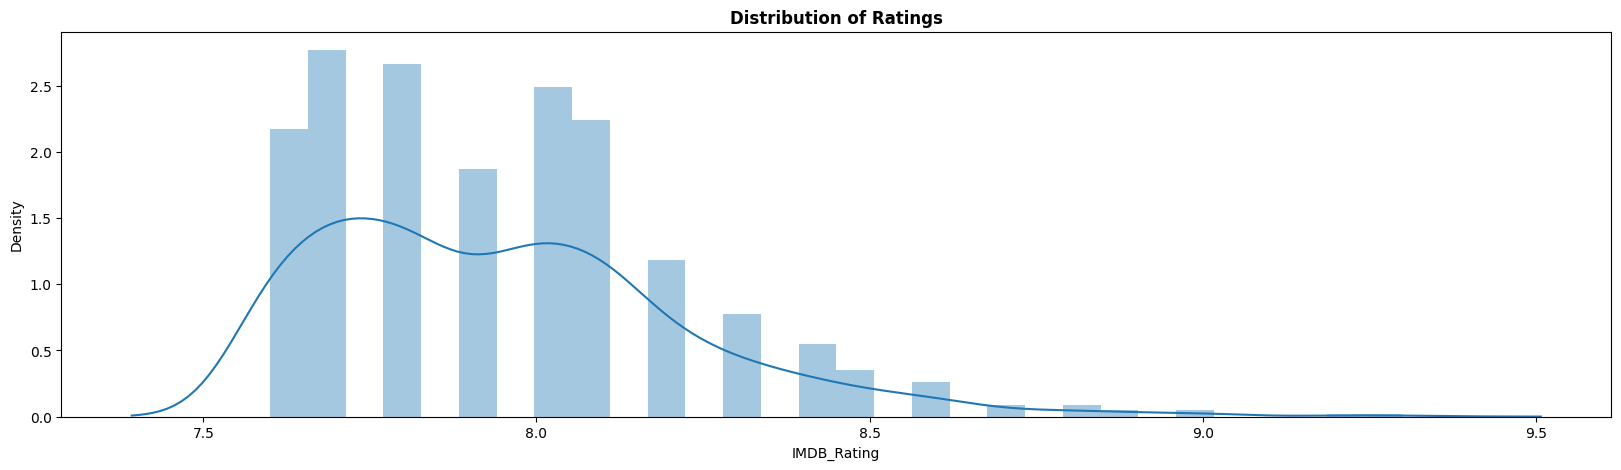

In [349]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(data['IMDB_Rating'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()

### **Certificate** 

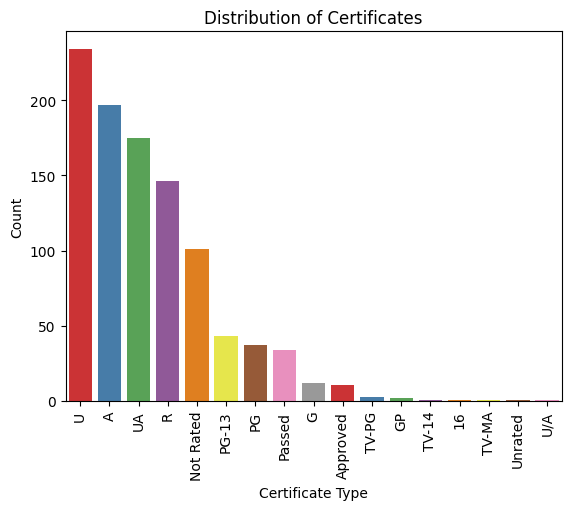

In [350]:
certificates = data['Certificate'].value_counts()

plt.figure()
sns.barplot(x=certificates.index, y=certificates.values, palette='Set1')
plt.title('Distribution of Certificates')
plt.xlabel('Certificate Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [351]:
Certificate_analysis = data.groupby('Certificate').agg({'Gross':'sum'}).reset_index().sort_values('Gross',ascending=False)
Certificate_analysis.style.background_gradient(cmap='Reds')


,Certificate,Gross
15,UA,21376790586
13,U,17449316129
1,A,11499683907
9,R,3482135918
7,PG-13,1440966426
3,G,495963257
6,PG,429318559
5,Not Rated,168145839
8,Passed,125017736
2,Approved,41694084


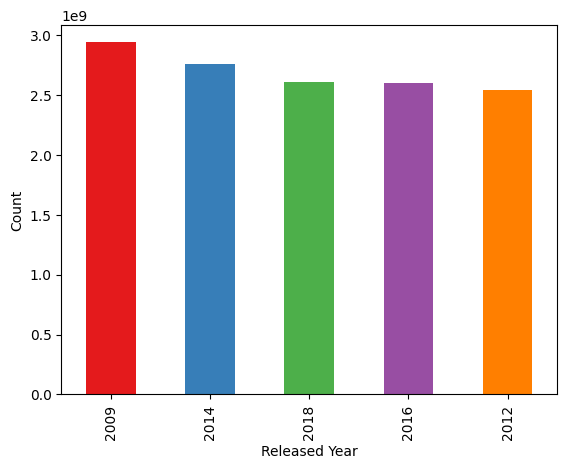

In [352]:
plt.figure()
data.groupby('Released_Year')['Gross'].sum().sort_values(ascending=False).head().plot(kind='bar', color=sns.color_palette('Set1'))
plt.xlabel('Released Year')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

### **Most Appeared Director**

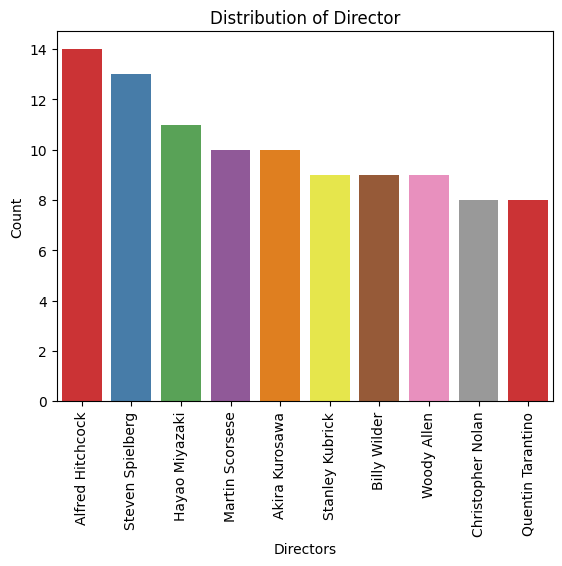

In [353]:
director = data['Director'].value_counts().head(10)

plt.figure()
sns.barplot(x=director.index, y=director.values, palette='Set1')
plt.title('Distribution of Director')
plt.xlabel('Directors')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

### **Appearances of Stars in Top voted movies**

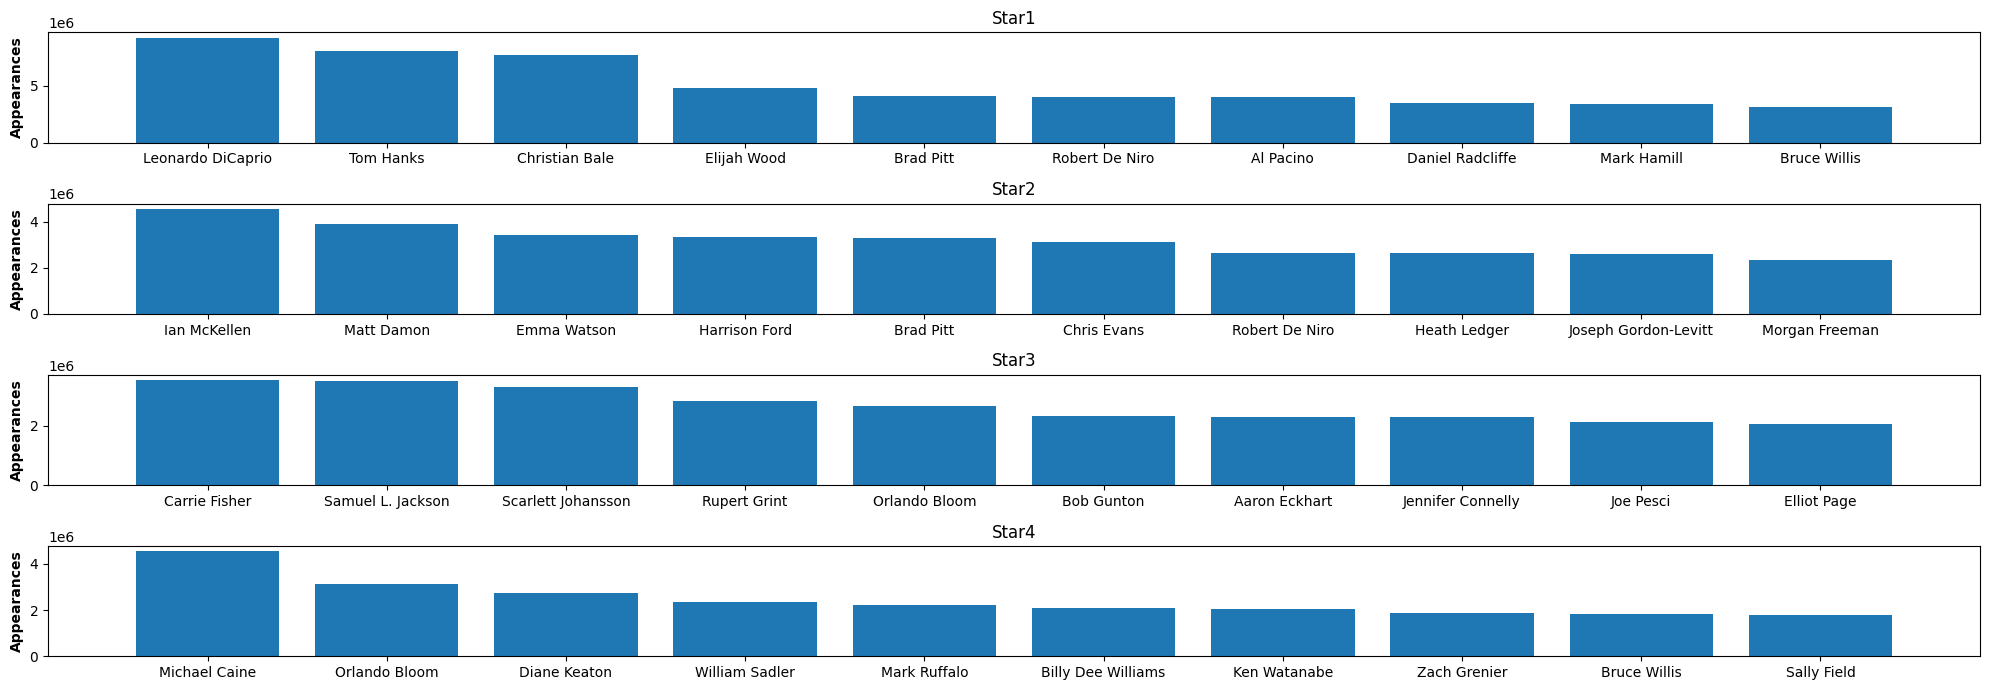

In [354]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['No_of_Votes'],ascending=False)[:10]
    axs[ax].bar(d[x],d['No_of_Votes'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### **Appearances of Stars in top rated movies**

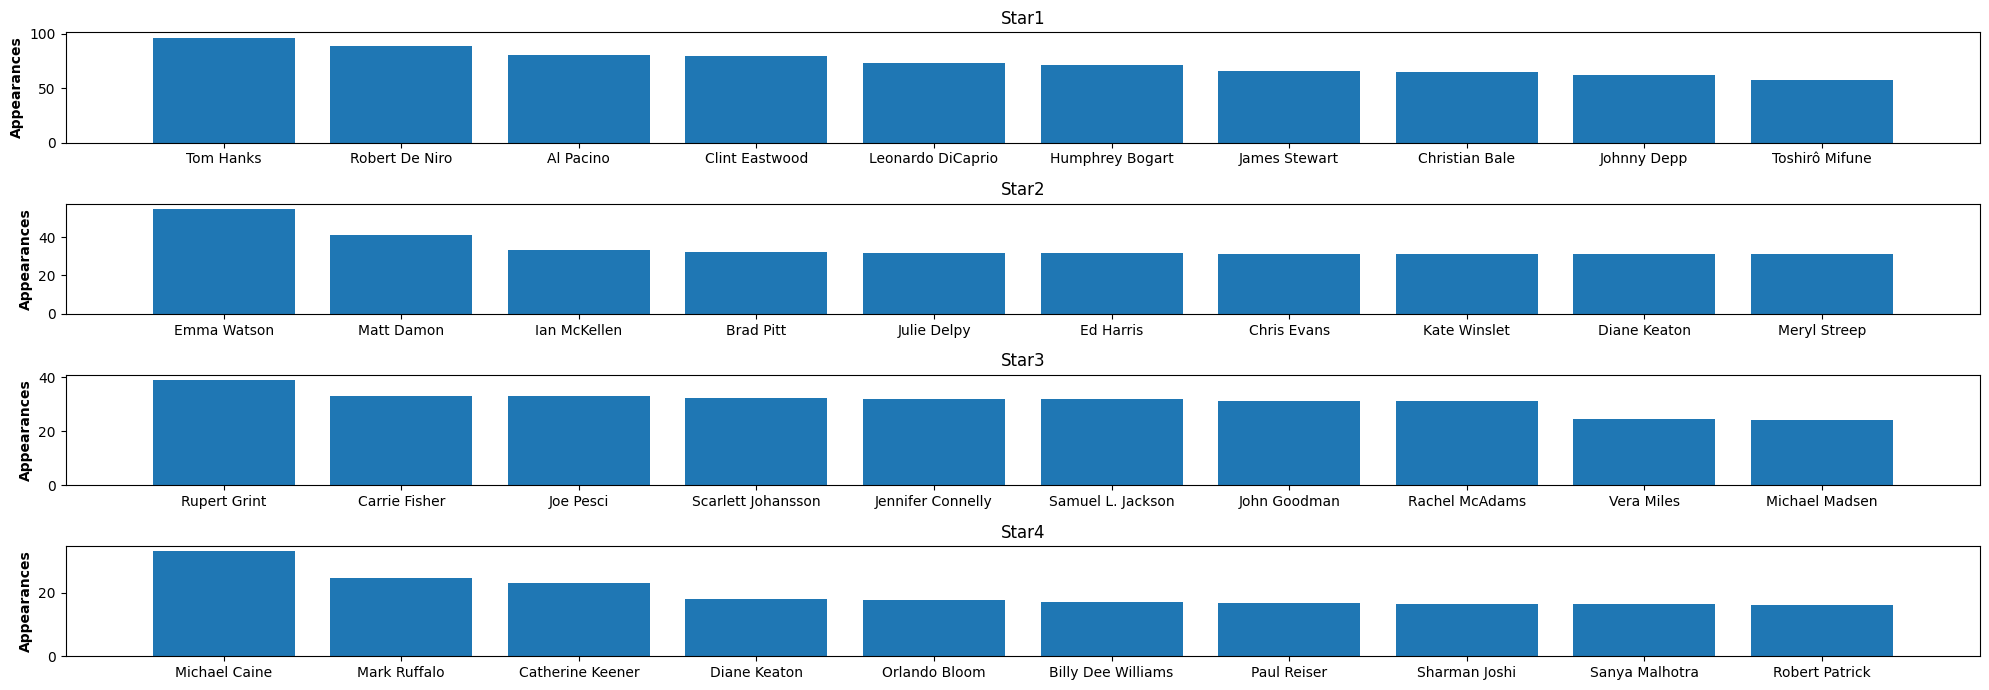

In [355]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['IMDB_Rating'],ascending=False)[:10]
    axs[ax].bar(d[x],d['IMDB_Rating'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### **Genres**

In [356]:
from collections import Counter
from collections import defaultdict

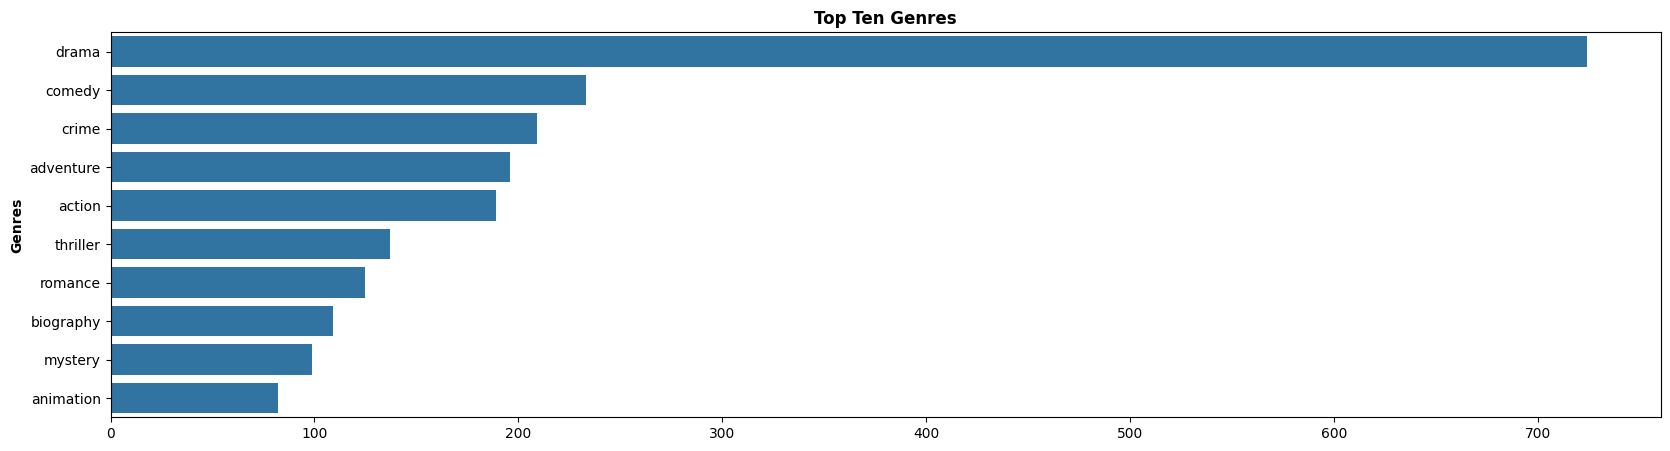

In [357]:
genre = []
for x in data['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count = Counter(genre)
count = count.most_common()[:10]
x, y = zip(*count)

fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=list(y), y=list(x))
g.set_ylabel("Genres", weight="bold")
g.set_title("Top Ten Genres", weight="bold")
plt.show()


### **Top Genres by Number of Votes**

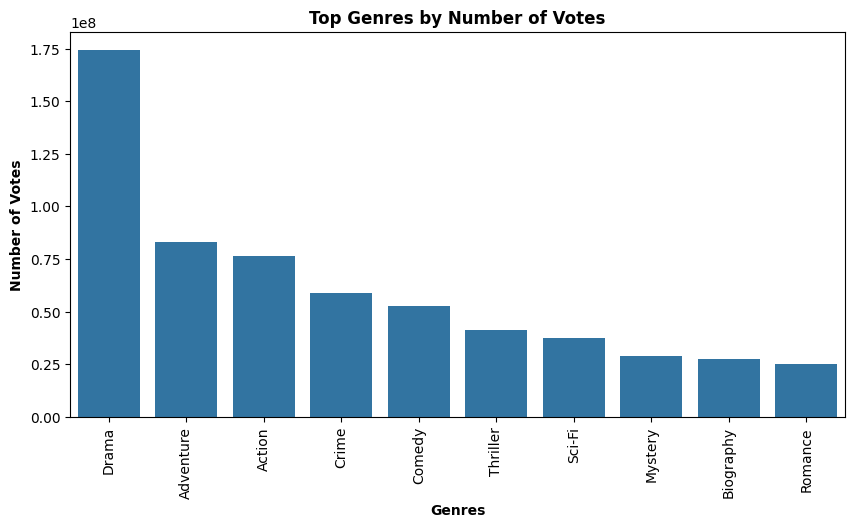

In [358]:
# Create a dictionary to hold genre votes
genre_votes = defaultdict(int)

# Populate the dictionary with votes for each genre
for index, row in data.iterrows():
    genres = row['Genre'].split(', ')
    for genre in genres:
        genre_votes[genre] += row['No_of_Votes']

# Sort genres by number of votes
sorted_genres = sorted(genre_votes.items(), key=lambda x: x[1], reverse=True)

# Extract the genres and their vote counts
top_genres, top_votes = zip(*sorted_genres[:10])

# Plot the top genres by number of votes
fig, axs = plt.subplots(figsize=(10, 5))
sns.barplot(x=list(top_genres), y=list(top_votes), ax=axs)
axs.set_ylabel("Number of Votes", weight="bold")
axs.set_xlabel("Genres", weight="bold")
axs.set_title("Top Genres by Number of Votes", weight="bold")
plt.xticks(rotation=90)
plt.show()

### **Top Genres by Gross**

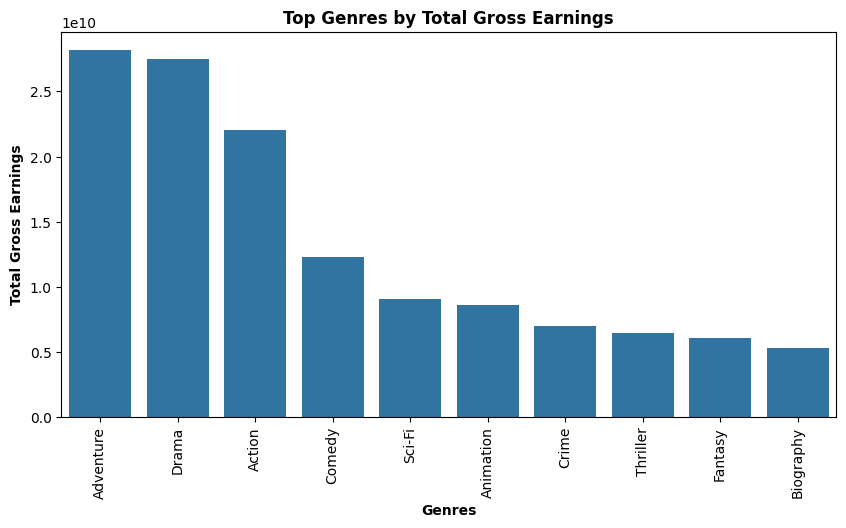

In [361]:
# Create a dictionary to hold genre gross earnings
genre_gross = defaultdict(int)

# Populate the dictionary with gross earnings for each genre
for index, row in data.iterrows():
    genres = row['Genre'].split(', ')
    for genre in genres:
        genre_gross[genre] += row['Gross']

# Sort genres by gross earnings
sorted_genres = sorted(genre_gross.items(), key=lambda x: x[1], reverse=True)

# Extract the genres and their gross earnings
top_genres, top_gross = zip(*sorted_genres[:10])

# Plot the top genres by gross earnings
fig, axs = plt.subplots(figsize=(10, 5))
sns.barplot(x=list(top_genres), y=list(top_gross), ax=axs)
axs.set_ylabel("Total Gross Earnings", weight="bold")
axs.set_xlabel("Genres", weight="bold")
axs.set_title("Top Genres by Total Gross Earnings", weight="bold")
plt.xticks(rotation=90)
plt.show()

### **Top Genres by Rating**

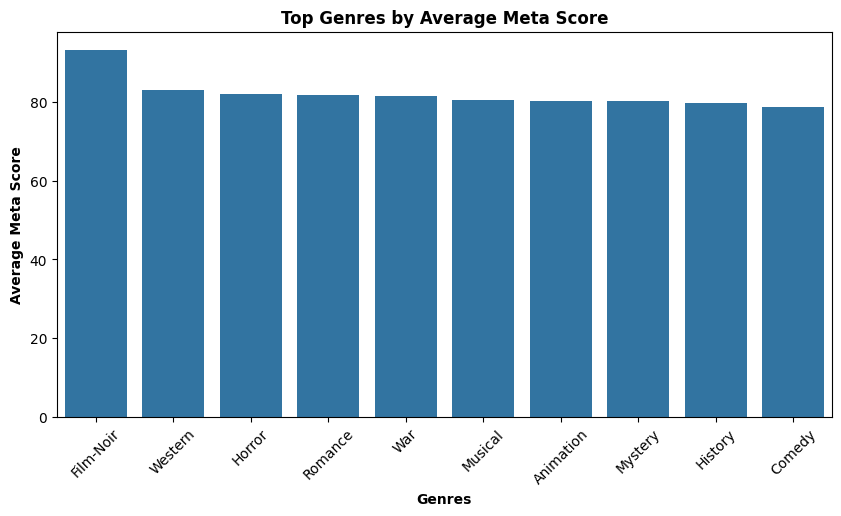

In [363]:
# Create a dictionary to hold genre Meta scores
genre_meta_scores = defaultdict(list)

# Populate the dictionary with Meta scores for each genre
for index, row in data.iterrows():
    genres = row['Genre'].split(', ')
    for genre in genres:
        genre_meta_scores[genre].append(row['Meta_score'])

# Calculate the average Meta score for each genre
average_meta_scores = {genre: sum(scores)/len(scores) for genre, scores in genre_meta_scores.items()}

# Sort genres by average Meta score
sorted_genres = sorted(average_meta_scores.items(), key=lambda x: x[1], reverse=True)

# Extract the genres and their average Meta scores
top_genres, top_avg_meta_scores = zip(*sorted_genres[:10])

# Plot the top genres by average Meta score
fig, axs = plt.subplots(figsize=(10, 5))
sns.barplot(x=list(top_genres), y=list(top_avg_meta_scores), ax=axs)
axs.set_ylabel("Average Meta Score", weight="bold")
axs.set_xlabel("Genres", weight="bold")
axs.set_title("Top Genres by Average Meta Score", weight="bold")
plt.xticks(rotation=45)
plt.show()